In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
plt.rcParams['figure.figsize'] = (9, 5)
sns.set_context("notebook")
sns.set_style("whitegrid")

df = pd.read_csv("data.csv")

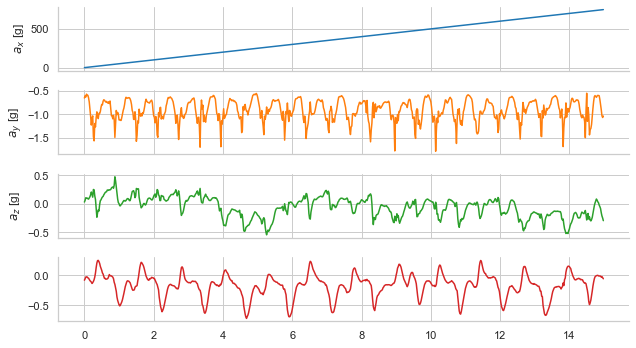

In [44]:
df.index /= 50
ax = df.plot(subplots=True, legend=False)
ax[2].set_xlabel("$t$ [sec]")
ax[0].set_ylabel("$a_x$ [g]")
ax[1].set_ylabel("$a_y$ [g]")
ax[2].set_ylabel("$a_z$ [g]")
sns.despine()
plt.tight_layout()

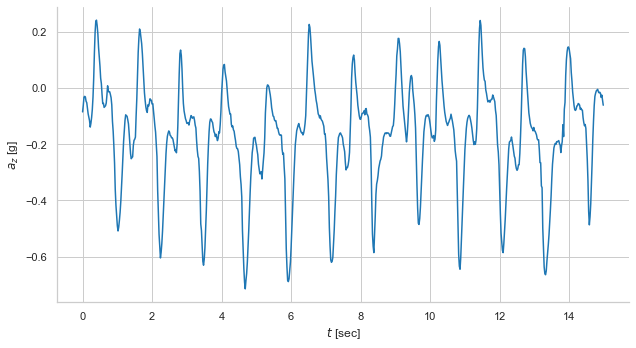

In [45]:
plt.figure()
az = df["accelZ"].reset_index(drop=True)
az.index = az.index/50
ax = az.plot()
ax.set_xlabel("$t$ [sec]")
ax.set_ylabel("$a_z$ [g]")
sns.despine()
plt.tight_layout()

In [46]:
az

0.00    -0.084961
0.02    -0.062012
0.04    -0.032715
0.06    -0.029785
0.08    -0.031738
           ...   
14.90   -0.018799
14.92   -0.033447
14.94   -0.025391
14.96   -0.042480
14.98   -0.061279
Name: accelZ, Length: 750, dtype: float64

In [47]:
daz = az.diff()
daz.head()

0.00         NaN
0.02    0.022949
0.04    0.029297
0.06    0.002930
0.08   -0.001953
Name: accelZ, dtype: float64

In [48]:
daz = daz.fillna(np.inf)
daz.head()

0.00         inf
0.02    0.022949
0.04    0.029297
0.06    0.002930
0.08   -0.001953
Name: accelZ, dtype: float64

In [49]:
daz_shifted = daz.shift(-1)
daz_shifted.head()

0.00    0.022949
0.02    0.029297
0.04    0.002930
0.06   -0.001953
0.08   -0.015137
Name: accelZ, dtype: float64

In [50]:
data = pd.DataFrame(az.rename("az"))
data["daz"] = daz
data["daz_shifted"] = daz_shifted

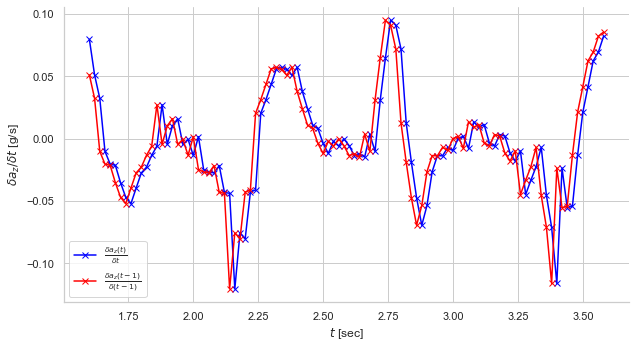

In [51]:
plt.figure()
ax = data.iloc[80:180].daz.plot(style="-bx", label=r"$\frac{\delta a_z(t)}{\delta t}$")
data.iloc[80:180].daz_shifted.plot(style="-rx", label=r"$\frac{\delta a_z(t-1)}{\delta (t-1)}$")
plt.legend()
ax.set_xlabel("$t$ [sec]")
ax.set_ylabel(r"$\delta{} a_z / \delta{} t$ [g/s]")
sns.despine()
plt.tight_layout()

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

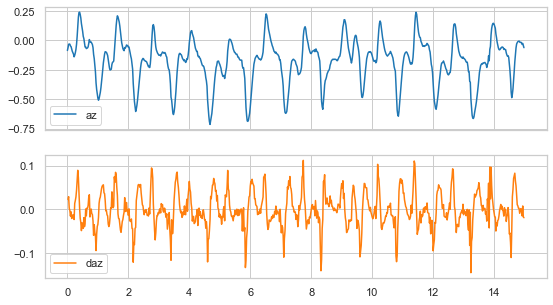

In [52]:
data[["az", "daz"]].plot(subplots=True)

In [53]:
data["valleys"] = (data.daz < 0) & (data.daz_shifted >= 0)

In [54]:
limit = data.az.mean() - data.az.std()
data["select_valleys"] = (data.az < limit) & data.valleys

In [55]:
data[data["select_valleys"]]

,az,daz,daz_shifted,valleys,select_valleys
1.02,-0.508789,-0.018311,0.014160,True,True
2.24,-0.604736,-0.041260,0.020264,True,True
3.48,-0.630615,-0.013428,0.020996,True,True
4.68,-0.714844,-0.023926,0.029785,True,True
5.92,-0.688965,-0.003906,0.010254,True,True
7.16,-0.620361,-0.008545,0.003662,True,True
8.38,-0.585938,-0.022949,0.064453,True,True
9.68,-0.485596,-0.004150,0.021240,True,True
10.86,-0.645020,-0.010742,0.041992,True,True
12.10,-0.585938,-0.007568,0.033203,True,True


In [41]:
data.select_valleys.sum()

12

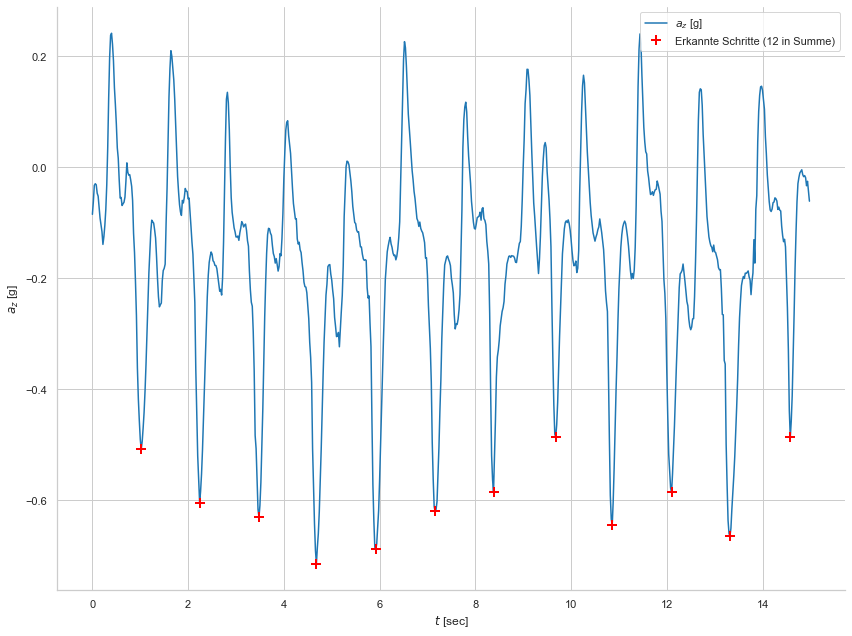

In [42]:
plt.figure()
ax = data.az.plot(label="$a_z$ [g]")
ax.plot(data[data["select_valleys"]].az, "r+", markersize=10, mew=2, label=f"Erkannte Schritte ({data.select_valleys.sum()} in Summe)")
ax.set_xlabel("$t$ [sec]")
ax.set_ylabel("$a_z$ [g]")
ax.legend(loc=1)
sns.despine()
plt.tight_layout()

In [18]:
pd.Series(data.index[data.select_valleys].values).diff()

0      NaN
1     1.22
2     1.24
3     1.20
4     1.24
5     1.24
6     1.22
7     1.30
8     1.18
9     1.24
10    1.22
11    1.26
dtype: float64